In [3]:
import torch
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

PyTorch version: 2.3.0
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [ ]:
# Set the device
#device = "mps" if torch.backends.mps.is_available() else "cpu"


In [4]:
import pandas as pd
import os
from glob import glob
import numpy as np


In [5]:
def get_audio_files(data_dir):
    file_names = []
    file_paths = []
    

    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(data_dir):
        # Use glob to find all .wav files in the current directory
        for fp in sorted(glob(os.path.join(root, '*.wav'))):
            bn = os.path.basename(fp)
            file_names.append(bn)
            file_paths.append(fp)
            

    # Create a DataFrame from the collected file names and paths
    df = pd.DataFrame({
        "filename": file_names,
        "filepath": file_paths,
    })
    return df


In [6]:
# Define the root directory containing all subfolders of interest
folder_path = '/Users/evgenynazarenko/DACS_3_year/Thesis/GardenFiles23'
temp_df = get_audio_files(folder_path)
print(temp_df.shape)


(390738, 2)


In [7]:
temp_df.head()

,filename,filepath
0,er_file_2024_01_10_10_00_00.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...
1,er_file_2024_01_10_10_00_44.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...
2,er_file_2024_01_10_10_00_51.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...
3,er_file_2024_01_10_10_01_11.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...
4,er_file_2024_01_10_10_01_58.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...


Ok, now let's get the labeld data with BirdNET and filter (Streptopelia decaocto_Eurasian Collared-Dove 3819) and
(Columba palumbus_Common Wood-Pigeon 3182) detections
 

In [10]:
# read the file from metadata folder
metedata = pd.read_csv('../MIT_AST/metadata/stats_full_25.04_full.csv')
metedata.shape

(404553, 14)

In [16]:
# filter dove detections
dove_df = metedata[metedata['BirdNET'] == 'Streptopelia decaocto_Eurasian Collared-Dove']
print(dove_df.shape)



(3819, 14)


In [18]:
from datetime import datetime

def generate_file_name(date_time_str, file_prefix='er_file_'):
    """
    Generate a file path for an audio file based on the date and time.

    Parameters:
    - date_time_str (str): The date and time string in the format 'YYYY-MM-DD HH:MM:SS'.
    
    - file_prefix (str): Prefix for the filename.

    Returns:
    - str: The full path to the file.
    """
    # Convert the date_time_str to a datetime object
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    
    # Format the datetime object into the filename format 'YYYY_MM_DD_H_MM_SS'
    file_name = date_time_obj.strftime('%Y_%m_%d_%-H_%M_%S')
    
    # Append file extension
    file_extension = '.wav'
    
    # Construct the full file path
    full_file_name = f"{file_prefix}{file_name}{file_extension}"
    
    return full_file_name

# Example usage




In [19]:
# reconstruct the file path from datetime column and add it to the dataframe
# Applying the function to create file paths using .loc and column names directly
dove_df.loc[:, 'file_name'] = dove_df['datetime'].apply(generate_file_name)
dove_df.head()

/var/folders/lh/0lt7mv811l56hczm0y7dwzym0000gn/T/ipykernel_2821/2334565232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dove_df.loc[:, 'file_name'] = dove_df['datetime'].apply(generate_file_name)


,datetime,precipRate,pressureMax,dewptAvg,windgustHigh,windspeedAvg,tempAve,humidityAvg,winddirAvg,uvHigh,solarRadiationHigh,BirdNET,MIT_AST_label,sound_class_label,file_name
1,2024-03-03 08:34:50,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,er_file_2024_03_03_8_34_50.wav
2,2024-03-03 08:34:53,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Owl,bird,er_file_2024_03_03_8_34_53.wav
3,2024-03-03 08:34:56,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Bird,bird,er_file_2024_03_03_8_34_56.wav
5,2024-03-03 08:35:02,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Hoot,bird,er_file_2024_03_03_8_35_02.wav
7,2024-03-03 08:35:08,0.0,995.33,7.6,3.5,1.4,9.6,88.0,286.0,0.0,36.0,Streptopelia decaocto_Eurasian Collared-Dove,Hoot,bird,er_file_2024_03_03_8_35_08.wav


In [20]:
dove_df['file_name'].describe()

count                               3819
unique                              3819
top       er_file_2024_03_03_8_34_50.wav
freq                                   1
Name: file_name, dtype: object

In [21]:
# check the matches between dove_df and temp_df
found_df = dove_df[dove_df['file_name'].isin(temp_df['filename'])]
found_df.shape


(3819, 15)

We have filtered out Dove subset from GardenFiles23. Now we make machinery to cluster and hopefully build a classifier to accurately split Dove dataset into "kwah" and "koo-Kook" classes for futher analysis.

Now let's process 1 big Folder and check the classes if they confirm with the ornitology knowledge:

Songs

Males give the distinctive koo-KOO-kook song to defend territories and attract mates. The song may be repeated 3–12 times with the middle syllable much longer than the first and last. Females advertise with a softer version of the song. Both sexes give a lower-pitched, slower version when searching for nest sites and building the nest.

Calls

When excited or alarmed, they react with a loud hwaah, a call they also give just before alighting.  

In [22]:
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [23]:
class Vox(Dataset):
    def __init__(self, dataset_dataframe, audio_sr):
        """ Dataset for vocalization classification with AVES

        Input
        -----
        dataset_dataframe (pandas dataframe): indicating the filepath, annotations and partition of a signal
        audio_sr (int): sampling rate expected by network
        annotation_name (list[str]): string corresponding to the annotation columns in the dataframe, e.g. ["call_type","recording_date"]
        """
        super().__init__()
        self.audio_sr = audio_sr
        #self.annotation_names = annotation_names
        self.dataset_info = dataset_dataframe

    def __len__(self):
        return len(self.dataset_info)

    def get_one_item(self, idx):
      """ Load base audio """
      row = self.dataset_info.iloc[idx]
      x, sr = torchaudio.load(row["filepath"])
      if len(x.size()) == 2:
          x = x[0, :]
      if sr != self.audio_sr:
          x = torchaudio.functional.resample(x, sr, self.audio_sr)
      return x, row

    def __getitem__(self, idx):
        x, row = self.get_one_item(idx)
        out = {"x" : x, "filepath" : row['filepath'], "filename" : row['filename']}
        # no annotations for now
        #for k in self.annotation_names:
        #  out[k] = row[k]
        return out

def get_dataloader(dataset_dataframe, audio_sr):
    return DataLoader(
            Vox(dataset_dataframe, audio_sr),
            batch_size=1,
            shuffle=False,
            drop_last=False
        )

In [24]:
from torchaudio.models import wav2vec2_model
import json
import torch.nn as nn

In [25]:
class AvesMeanEmbedding(nn.Module):
    """ Uses AVES Hubert to embed sounds and classify """
    def __init__(self, config_path, model_path, embedding_dim=768):
        super().__init__()
        # reference: https://pytorch.org/audio/stable/_modules/torchaudio/models/wav2vec2/utils/import_fairseq.html
        self.config = self.load_config(config_path)
        self.model = wav2vec2_model(**self.config, aux_num_out=None)
        self.model.load_state_dict(torch.load(model_path))
        self.audio_sr = 16000

    def load_config(self, config_path):
        with open(config_path, 'r') as ff:
            obj = json.load(ff)
        return obj

    def forward(self, sig):
        """
        Input
          sig (Tensor): (batch, time)
        Returns
          mean_embedding (Tensor): (batch, output_dim)
          logits (Tensor): (batch, n_classes)
        """
        # extract_feature in the sorchaudio version will output all 12 layers' output, -1 to select the final one
        out = self.model.extract_features(sig)[0][-1]
        mean_embedding = out.mean(dim=1) #over time
        return mean_embedding

In [26]:
import sklearn.cluster
from tqdm import tqdm
import matplotlib.pyplot as plt

In [27]:
def run(dataset_dataframe,n_clusters, aves_sr=16000):

  print("~~ Setting up model")
  embedding_model = AvesMeanEmbedding(
      config_path="/Users/evgenynazarenko/DACS_3_year/Thesis/AVES_bio/config.json",
      model_path="/Users/evgenynazarenko/DACS_3_year/Thesis/AVES_bio/aves-base-bio.torchaudio.pt"
  );
  embedding_model.eval()
# Determine the device to use: MPS if available, otherwise CPU
  device = "mps" if torch.backends.mps.is_available() else "cpu"
  embedding_model.to(device)

  print("~~ Setting up dataloader")
  dataloader = get_dataloader(dataset_dataframe, embedding_model.audio_sr)

  print(f"~~ Compute AVES embeddings")
  with torch.no_grad():
    features = []; filepaths = []; filenames = []# ; known_classes = {k:[] for k in annotation_names} no annotations for now
    for data_idx, data_dict in enumerate(tqdm(dataloader)):
        x = data_dict["x"].to(device)# move data to device
        features.append(embedding_model(x).cpu().numpy())
        filepaths.append(data_dict["filepath"])
        filenames.append(data_dict["filename"])
        #no annotations for now
        #for k in annotation_names:
        #  known_classes[k].append(data_dict[k])

  print(f"~~ Begin clustering ")
  X = np.concatenate(features, axis=0) #(n_samples, n_features)
  cluster_method = sklearn.cluster.KMeans(
    n_clusters=n_clusters,
    init='k-means++',
    n_init='auto',
    random_state=0
    )
  predictions = cluster_method.fit_predict(X)

  return {
        "filepaths": filepaths,
        "filenames": filenames,
        "predictions": predictions
    }


In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


def run_aves(dataset_dataframe):
    """
    Run AVES on a dataframe of audio files

    Input
    -----
    dataframe (pandas dataframe): containing columns "filename" and "filepath"

    Returns
    -------
    dictionary with keys "filepaths", "filenames", "features", where "features" is a list of numpy arrays
    """
    print("~~ Setting up model")
    embedding_model = AvesMeanEmbedding(
        config_path="/Users/evgenynazarenko/DACS_3_year/Thesis/AVES_bio/config.json",
        model_path="/Users/evgenynazarenko/DACS_3_year/Thesis/AVES_bio/aves-base-bio.torchaudio.pt"
    );
    embedding_model.eval()
    # Determine the device to use: MPS if available, otherwise CPU
    device = "mps" if torch.backends.mps.is_available() else "cpu"
    embedding_model.to(device)

    print("~~ Setting up dataloader")
    dataloader = get_dataloader(dataset_dataframe, embedding_model.audio_sr)

    print(f"~~ Compute AVES embeddings")
    with torch.no_grad():
        features = []; filepaths = []; filenames = []# ; known_classes = {k:[] for k in annotation_names} no annotations for now
        for data_idx, data_dict in enumerate(tqdm(dataloader)):
            x = data_dict["x"].to(device)# move data to device
            features.append(embedding_model(x).cpu().numpy())
            filepaths.append(data_dict["filepath"])
            filenames.append(data_dict["filename"])

    return {
        "filepaths": filepaths,
        "filenames": filenames,
        "features": features
    }


def dbscan_clustering(aves_results_dict):
    """
    Perform DBSCAN clustering on AVES embeddings

    Input

    aves_results_dict (dict): output of run_aves

    Returns

    aves_results_dict (dict): updated with key "predictions"
    """
    print(f"~~ Begin clustering ")


    X = np.concatenate(aves_results_dict["features"], axis=0) #(n_samples, n_features)

    # Standardize the features before clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    cluster_method = sklearn.cluster.DBSCAN(
        eps=20,
        min_samples=5,
        metric='euclidean',
        n_jobs=-1
    )
    predictions = cluster_method.fit_predict(X_scaled)

    aves_results_dict["predictions"] = predictions

    return aves_results_dict

def knn_clustering(aves_results_dict, n_clusters):
    """
    Perform KMeans clustering on AVES embeddings

    Input

    aves_results_dict (dict): output of run_aves

    Returns

    aves_results_dict (dict): updated with key "predictions"
    """
    print(f"~~ Begin clustering ")

    X = np.concatenate(aves_results_dict["features"], axis=0) #(n_samples, n_features)

    cluster_method = sklearn.cluster.KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init='auto',
        random_state=0
    )
    predictions = cluster_method.fit_predict(X)

    aves_results_dict["predictions"] = predictions

    return aves_results_dict


In [29]:
# process the .wav file if the filename is in the list of the dove_df

def run_cluster_aves(folder_path, bird_df,n_clusters):
    # Get the list of files in the folder
    df = get_audio_files(folder_path)# file names and paths
    print(f'Shape from get_audio_files {df.shape}')
    # check if the file name is in the dove_df
    df['is_dove'] = df['filename'].apply(lambda x: x in bird_df['file_name'].values)
    print(f'shape from is_dove check{df.shape}')
    # filter only dove files
    df = df[df['is_dove']]
    print(f'shape df before run{df.shape}')
    # Run the clustering
    results = run(df, n_clusters)
    #print(f"Clustering results: {results}")
    results_df = pd.DataFrame(results)
    print(f' results shape{results_df.shape}')
     # Flatten the lists in results['filenames'] and results['filepaths']
    flattened_filenames = [item for sublist in results['filenames'] for item in sublist]
    flattened_filepaths = [item for sublist in results['filepaths'] for item in sublist]
    results_df = pd.DataFrame({
        'filenames': flattened_filenames,
        'filepaths': flattened_filepaths,
        'predictions': results['predictions']
    })
   # Add filepaths and clusters to bird_df using .loc to avoid SettingWithCopyWarning
    bird_df.loc[:, 'filepaths'] = bird_df['file_name'].map(dict(zip(results_df['filenames'], results_df['filepaths'])))
    bird_df.loc[:, 'clusters'] = bird_df['file_name'].map(dict(zip(results_df['filenames'], results_df['predictions'])))


    return bird_df
   

In [223]:
# test the function k-means clustering
folder_path = '/Users/evgenynazarenko/DACS_3_year/Thesis/GardenFiles23'
n_clusters = 4
clustered_dove_df = run_cluster_aves(folder_path, dove_df, n_clusters)


Shape from get_audio_files (390738, 2)
shape from is_dove check(390738, 3)
shape df before run(3820, 3)
~~ Setting up model
~~ Setting up dataloader
~~ Compute AVES embeddings


100%|██████████| 3820/3820 [02:15<00:00, 28.10it/s]


~~ Begin clustering 
 results shape(3820, 3)


In [224]:
# check for nan values
clustered_dove_df['clusters'].value_counts()


clusters
1.0    1493
2.0     931
0.0     869
3.0     526
Name: count, dtype: int64

In [ ]:
import IPython.display as ipd

def sample_and_listen(df, n_samples=10):
    clusters = df['clusters'].unique()
    for cluster in clusters:
        cluster_files = df[df['clusters'] == cluster]
        
        # Ensure you don't sample more than available files
        if len(cluster_files) < n_samples:
            sampled_files = cluster_files
        else:
            sampled_files = cluster_files.sample(n_samples)
        
        print(f"Cluster {cluster} ({len(sampled_files)} files)")
        for file_path in sampled_files['filepaths']:
            print(file_path)
            ipd.display(ipd.Audio(file_path))
            print("\n")

# Run the function with your clustered DataFrame
sample_and_listen(clustered_dove_df, n_samples=10)


cluster 1:exclusively  'koo-KOO-kook song', clear and mainly unaccompanied by other sounds.

cluster 0: 'hwaah' type appeared 3/10 times 'song' type sounds are acoompanied by other bird's sounds, speech or weather noise, wind or rain.

Now let's try DBSCAn as a clustering algorithm 

In [31]:
def run_cluster_aves_2(folder_path, bird_df):
    # Get the list of files in the folder
    df = get_audio_files(folder_path)# file names and paths
    print(f'Shape from get_audio_files {df.shape}')
    # check if the file name is in the dove_df
    df['is_dove'] = df['filename'].apply(lambda x: x in bird_df['file_name'].values)
    print(f'shape from is_dove check{df.shape}')
    # filter only dove files
    df = df[df['is_dove']]
    print(f'shape df before run_aves{df.shape}')
    # Run the feature extraction with AVES
    results_dic = run_aves(df)

    # Perform DBSCAN clustering on AVES embeddings
    results = dbscan_clustering(results_dic)

    #print(f"Clustering results: {results}")
    results_df = pd.DataFrame(results)
    print(f' results shape{results_df.shape}')
     # Flatten the lists in results['filenames'] and results['filepaths']
    flattened_filenames = [item for sublist in results['filenames'] for item in sublist]
    flattened_filepaths = [item for sublist in results['filepaths'] for item in sublist]
    results_df = pd.DataFrame({
        'filenames': flattened_filenames,
        'filepaths': flattened_filepaths,
        'predictions': results['predictions']
    })
   # Add filepaths and clusters to bird_df using .loc to avoid SettingWithCopyWarning
    bird_df.loc[:, 'filepaths'] = bird_df['file_name'].map(dict(zip(results_df['filenames'], results_df['filepaths'])))
    bird_df.loc[:, 'clusters'] = bird_df['file_name'].map(dict(zip(results_df['filenames'], results_df['predictions'])))

    return bird_df


In [195]:
# let's test the function
folder_path = '/Users/evgenynazarenko/DACS_3_year/Thesis/GardenFiles23'
clustered = run_cluster_aves_2(folder_path, dove_df)



Shape from get_audio_files (390738, 2)
shape from is_dove check(390738, 3)
shape df before run_aves(3820, 3)
~~ Setting up model
~~ Setting up dataloader
~~ Compute AVES embeddings


100%|██████████| 3820/3820 [02:31<00:00, 25.27it/s]


~~ Begin clustering 
 results shape(3820, 4)


In [196]:
#check # of clusters
clustered['clusters'].value_counts()

clusters
-1.0    2131
 1.0    1506
 0.0      94
 6.0      31
 4.0      26
 3.0       9
 7.0       7
 8.0       5
 2.0       5
 5.0       5
Name: count, dtype: int64

In [ ]:
sample_and_listen(clustered, n_samples=5)


DBSCAN

experiment 1:eps=20, min_samples=5,

clusters
-1.0    2131
 1.0    1506
 0.0      94
 6.0      31
 4.0      26
 3.0       9
 7.0       7
 8.0       5
 2.0       5
 5.0       5


Some results:
cluster 8: rain + koo-koo
cluster 0: kwah( all 94 files checked by human)
cluster 4: koo-koo+ steady wind
cluster 5: koo-koo + wind gust

experiment 2:eps=18, min_samples=10
clusters
-1.0    3055
 0.0     678
 1.0      69
 2.0      17
Name: count, dtype: int64

cluster 2 : rain + koo-koo

experiment 3:eps=22, min_samples=5

clusters
 0.0    2496
-1.0    1289
 5.0       8
 1.0       7
 2.0       5
 6.0       5
 4.0       5
 3.0       4
Name: count, dtype: int64


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def plot_k_distance(features, min_samples=5):
    # Flatten the list of numpy arrays into a single array
    X = np.concatenate(features, axis=0)
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Compute the k-distance graph
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(X_scaled)
    distances, indices = nbrs.kneighbors(X_scaled)
    
    # Sort the distances
    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    
    # Plot the distances
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title('k-distance Graph')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.show()




In [ ]:
# Example usage
#folder_path = '/Users/evgenynazarenko/DACS_3_year/Thesis/GardenFiles23'
df=temp_df
df['is_dove'] = df['filename'].apply(lambda x: x in dove_df['file_name'].values)
print(f'shape from is_dove check{df.shape}')
# filter only dove files
df = df[df['is_dove']]
results_dic = run_aves(df)


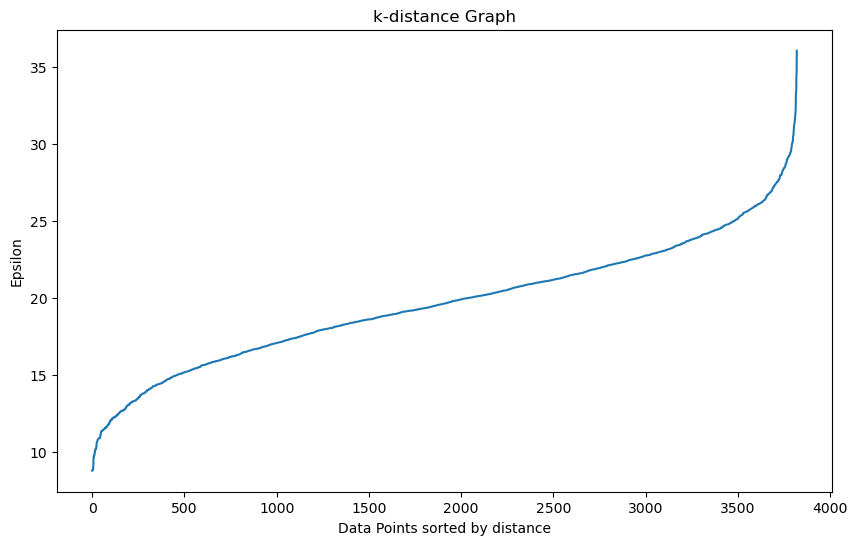

In [36]:
plot_k_distance(results_dic['features'], min_samples=5)

In [296]:
knn_res = knn_clustering(results_dic, n_clusters=20)
knn_res_df = pd.DataFrame(knn_res)
print(f' results shape{knn_res_df.shape}')
     # Flatten the lists in results['filenames'] and results['filepaths']
flattened_filenames = [item for sublist in knn_res['filenames'] for item in sublist]
flattened_filepaths = [item for sublist in knn_res['filepaths'] for item in sublist]
knn_res_df = pd.DataFrame({
        'filenames': flattened_filenames,
        'filepaths': flattened_filepaths,
        'clusters': knn_res['predictions']
    })


~~ Begin clustering 
 results shape(3820, 4)


In [297]:
knn_res_df['clusters'].value_counts()

clusters
3     353
8     303
5     287
15    284
2     247
9     242
13    203
12    198
11    183
14    182
7     176
10    174
16    167
17    166
1     166
18    152
6     115
19     83
0      78
4      61
Name: count, dtype: int64

In [ ]:
sample_and_listen(knn_res_df, n_samples=5)

In [ ]:
knn20_0 = knn_res_df[knn_res_df['clusters'].isin([0])]
sample_and_listen(knn20_0, n_samples=78)

so, experimenting with different clustering algorithm and listening to the files i identified 2 distinct clusters with clear and loud calls.

i created 2 labeled datasets: kwah_94 and koo_78, call and # of annotated files respectively. 

In [304]:
# get rid of kwah outlier er_file_2024_03_17_14_08_14.wav
koo_77 = knn20_0[knn20_0['filenames'] != 'er_file_2024_03_17_14_08_14.wav']
koo_77.shape

(77, 3)

In [ ]:
# filter clusters 1 and 5
knn_clusters_1_5 = knn_res_df[knn_res_df['clusters'].isin([1, 5])]
print(knn_clusters_1_5.shape)
sample_and_listen(knn_clusters_1_5, n_samples=20)



cluster 4 from knn_clustering(5) looks like good candidate for koo-kook class labels, clear and loud sonds with little noise.

In [ ]:
koo_df =knn_res_df[knn_res_df['clusters'] == 4]
sample_and_listen(koo_df, n_samples=30)

In [264]:
res = dbscan_clustering(results_dic)
flattened_filenames = [item for sublist in res['filenames'] for item in sublist]
flattened_filepaths = [item for sublist in res['filepaths'] for item in sublist]
res_df = pd.DataFrame({
        'filenames': flattened_filenames,
        'filepaths': flattened_filepaths,
        'clusters': knn_res['predictions']
    })
print(f' results shape{res_df.shape}')


~~ Begin clustering 
 results shape(3820, 3)


In [265]:
res_df['clusters'].value_counts()

clusters
-1    2131
 1    1507
 0      94
 6      31
 4      26
 3       9
 7       7
 2       5
 5       5
 8       5
Name: count, dtype: int64

In [ ]:
kwah_df = res_df[res_df['clusters'] == 0]
print(kwah_df.shape)
sample_and_listen(kwah_df, n_samples=94)

dbscan { eps=20,
        min_samples=5,
        metric='euclidean',
        n_jobs=-1}
        
cluster 0 are kwah call(All 94 files chacked by human ear)

cluster 8 - ko-kook + rain

cluster 5 - koo-kook + wind gusts

repeated clustering of -1 cluster, "noise" gave no great result. only small part of noise cluster was clustered out from original noise cluster. 
No point with proceeding with this mrthod of sequential clustering of noise.

In [308]:
# save the results
kwah_94 = kwah_df
kwah_94.head()
# save the results
kwah_94.to_csv('kwah_94.csv', index=False)
koo_77.to_csv('koo_77.csv', index=False)

let's prepare dtatset to train classifier. Lbeled data are scarce , so we will try simple models , SVm and logistic Regression.

In [41]:
# create dataset with koo and kwah files
koo_df = pd.read_csv('koo_77.csv')
kwah_df = pd.read_csv('kwah_94.csv')
kwah_df['call'] = 'kwah'
koo_df['call'] = 'koo'

# concatenate the dataframes
kwah_koo = pd.concat([kwah_df, koo_df])
kwah_koo.drop(columns=['clusters'], inplace=True)
kwah_koo.head() # labeled dataset

,filenames,filepaths,call
0,er_file_2024_01_10_9_31_45.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah
1,er_file_2024_01_11_11_54_01.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah
2,er_file_2024_01_11_12_04_38.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah
3,er_file_2024_01_09_13_26_14.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah
4,er_file_2024_01_09_13_26_59.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah


In [43]:
kwah_koo.shape

(171, 3)

In [47]:
results_dic['features'][0].shape

(1, 768)

In [49]:
aves_features_df = pd.DataFrame(results_dic)
aves_features_df.head()

,filepaths,filenames,features,predictions
0,[/Users/evgenynazarenko/DACS_3_year/Thesis/Gar...,[er_file_2024_01_10_9_31_22.wav],"[[0.22784886, 0.27459875, 0.09032677, -0.01894...",-1
1,[/Users/evgenynazarenko/DACS_3_year/Thesis/Gar...,[er_file_2024_01_10_9_31_45.wav],"[[0.059986934, 0.5494582, -0.055350088, -0.163...",-1
2,[/Users/evgenynazarenko/DACS_3_year/Thesis/Gar...,[er_file_2024_01_11_11_54_01.wav],"[[0.15569976, 0.15348442, 0.06914517, 0.078704...",-1
3,[/Users/evgenynazarenko/DACS_3_year/Thesis/Gar...,[er_file_2024_01_11_11_54_32.wav],"[[0.31468418, 0.37589628, 0.22994348, 0.102868...",-1
4,[/Users/evgenynazarenko/DACS_3_year/Thesis/Gar...,[er_file_2024_01_11_12_04_38.wav],"[[0.1333776, 0.3330072, 0.04702927, -0.0806516...",-1


In [50]:
# flatten the lists
flattened_filenames = [item for sublist in results_dic['filenames'] for item in sublist]
flattened_filepaths = [item for sublist in results_dic['filepaths'] for item in sublist]
flattened_features = [item for sublist in results_dic['features'] for item in sublist]

aves_features_df = pd.DataFrame({
    'filenames': flattened_filenames,
    'filepaths': flattened_filepaths,
    'features': flattened_features
})
aves_features_df.head()


,filenames,filepaths,features
0,er_file_2024_01_10_9_31_22.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,"[0.22784886, 0.27459875, 0.09032677, -0.018945..."
1,er_file_2024_01_10_9_31_45.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,"[0.059986934, 0.5494582, -0.055350088, -0.1638..."
2,er_file_2024_01_11_11_54_01.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,"[0.15569976, 0.15348442, 0.06914517, 0.0787045..."
3,er_file_2024_01_11_11_54_32.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,"[0.31468418, 0.37589628, 0.22994348, 0.1028684..."
4,er_file_2024_01_11_12_04_38.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,"[0.1333776, 0.3330072, 0.04702927, -0.08065165..."


In [51]:
# add features to the labeled dataset
kwah_koo['features'] = kwah_koo['filenames'].map(dict(zip(aves_features_df['filenames'], aves_features_df['features'])))
kwah_koo.head()

,filenames,filepaths,call,features
0,er_file_2024_01_10_9_31_45.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah,"[0.059986934, 0.5494582, -0.055350088, -0.1638..."
1,er_file_2024_01_11_11_54_01.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah,"[0.15569976, 0.15348442, 0.06914517, 0.0787045..."
2,er_file_2024_01_11_12_04_38.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah,"[0.1333776, 0.3330072, 0.04702927, -0.08065165..."
3,er_file_2024_01_09_13_26_14.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah,"[0.39120728, 0.3783249, -0.009254205, -0.16405..."
4,er_file_2024_01_09_13_26_59.wav,/Users/evgenynazarenko/DACS_3_year/Thesis/Gard...,kwah,"[0.08638751, 0.18240921, -0.002687087, 0.06530..."


In [52]:
# prepare for training, sub calls for 1 and 0 and make just features datset
kwah_koo['call'] = kwah_koo['call'].map({'kwah': 1, 'koo': 0})
features_df = kwah_koo[['features', 'call']]
features_df.head()

,features,call
0,"[0.059986934, 0.5494582, -0.055350088, -0.1638...",1
1,"[0.15569976, 0.15348442, 0.06914517, 0.0787045...",1
2,"[0.1333776, 0.3330072, 0.04702927, -0.08065165...",1
3,"[0.39120728, 0.3783249, -0.009254205, -0.16405...",1
4,"[0.08638751, 0.18240921, -0.002687087, 0.06530...",1


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



# Prepare the data
X = np.vstack(features_df['features'].values)
y = features_df['call'].values

# Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline and parameter grids
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

svm_param_grid = {
    'svc__kernel': ['rbf', 'linear'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto']
}

log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

log_reg_param_grid = {
    'log_reg__C': [0.1, 1, 10, 100],
    'log_reg__solver': ['lbfgs', 'liblinear']
}

# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=cv, scoring='accuracy')
svm_grid_search.fit(X, y)

# Perform GridSearchCV for Logistic Regression
log_reg_grid_search = GridSearchCV(log_reg_pipeline, log_reg_param_grid, cv=cv, scoring='accuracy')
log_reg_grid_search.fit(X, y)

# Print the best parameters and scores for both models
print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM Cross-Validation Score:", svm_grid_search.best_score_)

print("Best Logistic Regression Parameters:", log_reg_grid_search.best_params_)
print("Best Logistic Regression Cross-Validation Score:", log_reg_grid_search.best_score_)

# Evaluate the best models on a held-out test set (if available)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Evaluation
best_svm_model = svm_grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm = best_svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Logistic Regression Evaluation
best_log_reg_model = log_reg_grid_search.best_estimator_
best_log_reg_model.fit(X_train, y_train)
y_pred_log_reg = best_log_reg_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Best SVM Parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best SVM Cross-Validation Score: 0.9941176470588236
Best Logistic Regression Parameters: {'log_reg__C': 0.1, 'log_reg__solver': 'lbfgs'}
Best Logistic Regression Cross-Validation Score: 0.9941176470588236
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00 

In [54]:
# Extract features from the unseen data
X_unseen = np.vstack(aves_features_df['features'].values)

# Use the best SVM model to predict the labels for the unseen data
svm_predictions = best_svm_model.predict(X_unseen)

# Use the best Logistic Regression model to predict the labels for the unseen data
log_reg_predictions = best_log_reg_model.predict(X_unseen)

# Add predictions to the DataFrame
aves_features_df['svm_predictions'] = svm_predictions
aves_features_df['log_reg_predictions'] = log_reg_predictions

# Print the first few predictions for verification
print(aves_features_df[['filenames', 'svm_predictions', 'log_reg_predictions']].head())


                         filenames  svm_predictions  log_reg_predictions
0   er_file_2024_01_10_9_31_22.wav                1                    1
1   er_file_2024_01_10_9_31_45.wav                1                    1
2  er_file_2024_01_11_11_54_01.wav                1                    1
3  er_file_2024_01_11_11_54_32.wav                1                    1
4  er_file_2024_01_11_12_04_38.wav                1                    1


In [55]:
aves_features_df['svm_predictions'].value_counts()


svm_predictions
0    2268
1    1552
Name: count, dtype: int64

In [56]:
aves_features_df['log_reg_predictions'].value_counts()

log_reg_predictions
0    2564
1    1256
Name: count, dtype: int64

In [ ]:
# srename "lofg_reg_preddictions" fo clusters
aves_features_df.rename(columns={'log_reg_predictions': 'clusters'}, inplace=True)

# sample and listen to the files
sample_and_listen(aves_features_df[aves_features_df['svm_predictions'] == 1], n_samples=5)


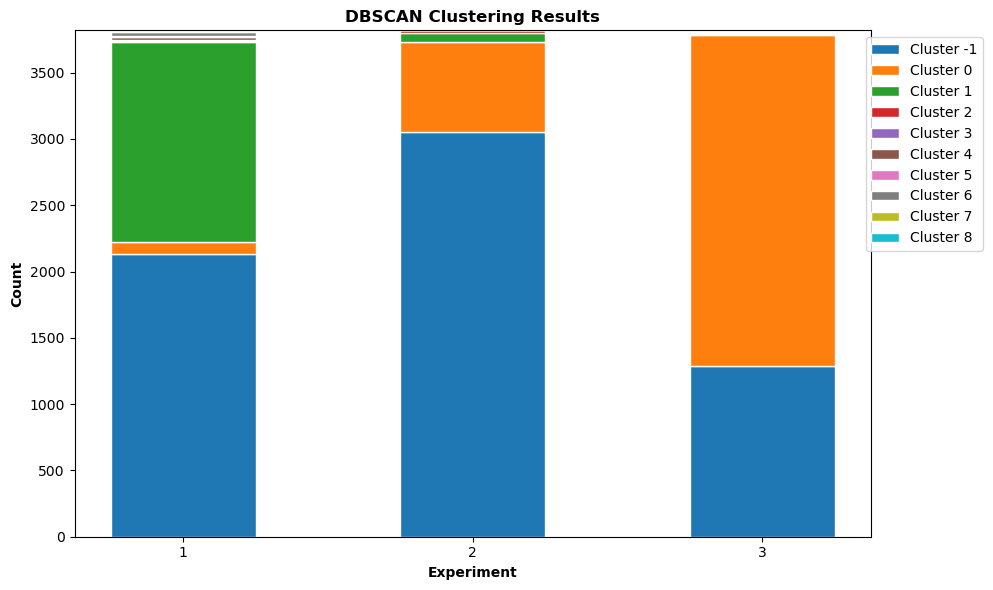

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
experiments = ['1', '2', '3']
cluster_data = {
    '-1': [2131, 3055, 1289],
    '0': [94, 678, 2496],
    '1': [1506, 69, 7],
    '2': [5, 17, 5],
    '3': [9, 0, 4],
    '4': [26, 0, 5],
    '5': [5, 0, 8],
    '6': [31, 0, 5],
    '7': [7, 0, 0],
    '8': [5, 0, 0]
}

# Bar width
bar_width = 0.5

# Position of bars on the x-axis
r = np.arange(len(experiments))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(experiments))
for cluster, counts in cluster_data.items():
    ax.bar(r, counts, bottom=bottom, edgecolor='white', width=bar_width, label=f'Cluster {cluster}')
    bottom += np.array(counts)

# Add labels
ax.set_xlabel('Experiment', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('DBSCAN Clustering Results', fontweight='bold')
ax.set_xticks(r)
ax.set_xticklabels(experiments)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Save and show the plot
plt.tight_layout()
plt.savefig('dbscan_clustering_results.png')
plt.show()
